In [ ]:
# Mount Google Drive (if using dataset from Drive)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 64

# Set dataset paths (adjust path as needed)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/splitdataset48x48/train',
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/splitdataset48x48/val',
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)


Found 480 images belonging to 6 classes.
Found 126 images belonging to 6 classes.


In [19]:
# Get class names
class_names = list(train_generator.class_indices.keys())
print("Class Names:", class_names)


Class Names: ['G', 'H', 'I', 'J', 'K', 'L']


In [20]:
# Define CNN model
model = Sequential()

# Convolutional Layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(len(class_names), activation='softmax'))  # Output neurons match class count

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 126, 126, 128)       │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 61, 61, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 13,358,214 (50.96 MB)

 Trainable params: 13,358,214 (50.96 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=100)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.2012 - loss: 1.8784 - val_accuracy: 0.1667 - val_loss: 1.7917
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.2079 - loss: 1.7889 - val_accuracy: 0.1667 - val_loss: 1.7917
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - accuracy: 0.1415 - loss: 1.7983 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.1294 - loss: 1.7929 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.1785 - loss: 1.7915 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.1748 - loss: 1.7914 - val_accuracy: 0.1667 - val_loss: 1.7917
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.1982 - loss: 1.7877 - val_accuracy: 0.2222 - val_loss: 1.7865
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.1797 - loss: 1.7828 - val_accuracy: 0.1667 - val

In [23]:
model.evaluate(validation_generator)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 1.0000 - loss: 9.2524e-06


[1.0694452612369787e-05, 1.0]

In [24]:
y_true = []
y_pred = []

for i in range(len(validation_generator)):
    x_val, y_val = validation_generator[i]
    y_true.extend(np.argmax(y_val, axis=1))  # Convert one-hot encoding to class labels
    y_pred.extend(np.argmax(model.predict(x_val), axis=1))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


In [25]:
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))



Classification Report:
               precision    recall  f1-score   support

           G       1.00      1.00      1.00        21
           H       1.00      1.00      1.00        21
           I       1.00      1.00      1.00        21
           J       1.00      1.00      1.00        21
           K       1.00      1.00      1.00        21
           L       1.00      1.00      1.00        21

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



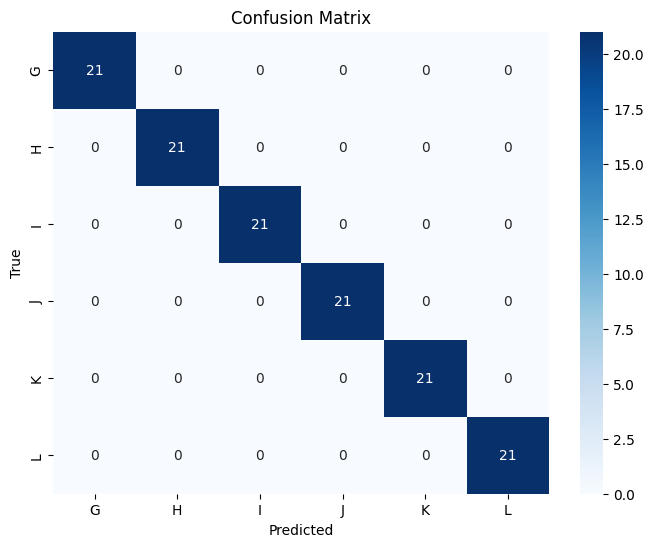

In [26]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


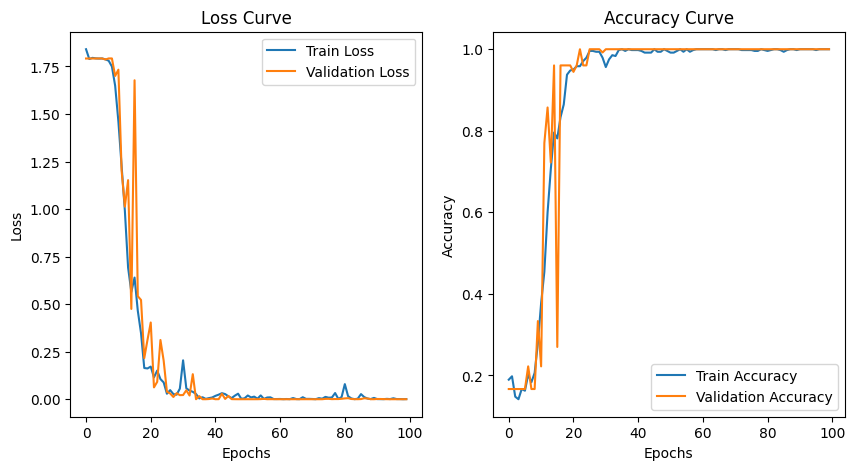

In [27]:
plt.figure(figsize=(10, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()


In [28]:
model.save('/content/drive/MyDrive/cnn_model.h5')


In [29]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/cnn_model.h5')
